In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
from neurodsp.sim import sim_noisy_oscillator as sim_nosc

In [8]:
#simulate a gradually increasing time series
osc1 = sim_nosc(2, 500, 2,  noise_generator='ou_process')
osc2 = sim_nosc(2, 500, 5,  noise_generator='ou_process')
expf = (np.arange(0, 1000, 1)/300)**3
ts = osc1*2 + osc2*2 + expf

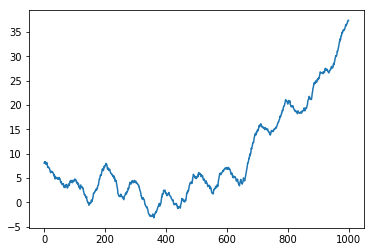

In [9]:
plt.plot(ts)

/home/allen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


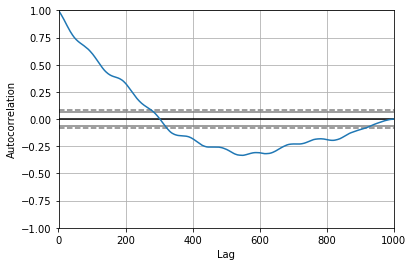

In [10]:
autocorrelation_plot(ts)

In [18]:
#fitting ARIMA
model = ARIMA(ts, order=np.array([5,1,0]))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  41.300
Method:                       css-mle   S.D. of innovations              0.232
Date:                Mon, 06 May 2019   AIC                            -68.599
Time:                        12:42:27   BIC                            -34.252
Sample:                             1   HQIC                           -55.544
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0296      0.015      1.924      0.055      -0.001       0.060
ar.L1.D.y      0.1144      0.032      3.627      0.000       0.053       0.176
ar.L2.D.y      0.0975      0.031      3.102      0.0

                0
count  999.000000
mean    -0.000044
std      0.232278
min     -0.710233
25%     -0.152399
50%     -0.000766
75%      0.159105
max      0.847005


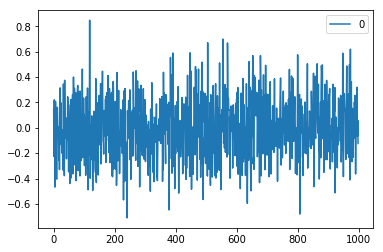

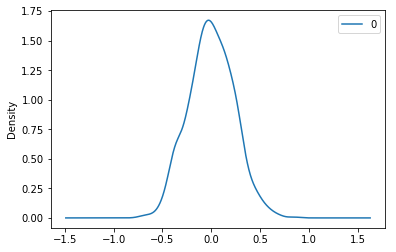

In [23]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())